<a href="https://colab.research.google.com/github/MikhailKuklin/exploratory_data_analysis_pandas/blob/main/2021_05_31_exploratory_data_analysis_pandas_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# load necessary library/modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
# open database file - cvs in that case

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [69]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92540 entries, 0 to 92539
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92540 non-null  object 
 1   continent                              88150 non-null  object 
 2   location                               92540 non-null  object 
 3   date                                   92540 non-null  object 
 4   total_cases                            89750 non-null  float64
 5   new_cases                              89749 non-null  float64
 6   new_cases_smoothed                     88737 non-null  float64
 7   total_deaths                           79835 non-null  float64
 8   new_deaths                             79993 non-null  float64
 9   new_deaths_smoothed                    88737 non-null  float64
 10  total_cases_per_million                89270 non-null  float64
 11  ne

In [70]:
# get names of all columns

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [71]:
# get a range of rows

df.index

RangeIndex(start=0, stop=92540, step=1)

In [72]:
# get number of columns and rows

df.shape

(92540, 59)

In [73]:
# check if database has duplicated

df.drop_duplicates().shape

(92540, 59)

In [74]:
# check table

#df.head(50)
df.tail(100)
#df.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
92440,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,2408.409,1.884,5.998,96.616,0.269,0.346,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,368518.0,24.794,0.082,2241.0,0.151,0.040,25.1,tests performed,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92441,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,2412.849,4.441,6.151,96.953,0.336,0.298,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1643.0,370161.0,24.905,0.111,2264.0,0.152,0.040,24.8,tests performed,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92442,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,2416.079,3.230,5.719,97.424,0.471,0.327,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.0,372034.0,25.031,0.126,2084.0,0.140,0.041,24.5,tests performed,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92443,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,2419.443,3.364,5.161,97.962,0.538,0.365,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804.0,373838.0,25.152,0.121,2047.0,0.138,0.037,26.7,tests performed,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92444,ZWE,Africa,Zimbabwe,2021-02-25,35994.0,34.0,64.429,1458.0,2.0,5.429,2421.730,2.288,4.335,98.096,0.135,0.365,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2965.0,376803.0,25.352,0.199,1903.0,0.128,0.034,29.5,tests performed,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,87.96,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92535,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92536,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92537,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.28

In [75]:
# average

df.mean()

total_cases                              9.428741e+05
new_cases                                6.061315e+03
new_cases_smoothed                       6.077658e+03
total_deaths                             2.536371e+04
new_deaths                               1.421025e+02
new_deaths_smoothed                      1.271633e+02
total_cases_per_million                  1.157166e+04
new_cases_per_million                    7.608220e+01
new_cases_smoothed_per_million           7.629075e+01
total_deaths_per_million                 2.521063e+02
new_deaths_per_million                   1.515893e+00
new_deaths_smoothed_per_million          1.356452e+00
reproduction_rate                        1.008643e+00
icu_patients                             1.097873e+03
icu_patients_per_million                 2.712690e+01
hosp_patients                            4.821180e+03
hosp_patients_per_million                1.755253e+02
weekly_icu_admissions                    2.910570e+02
weekly_icu_admissions_per_mi

In [76]:
df[['new_deaths','new_cases']].mean()

new_deaths     142.102521
new_cases     6061.314744
dtype: float64

In [77]:
df[df.continent=='Asia'][['new_deaths','new_cases']].mean()

new_deaths      36.384140
new_cases     2345.985824
dtype: float64

In [78]:
# slicing

df[df.continent=='Asia'][['new_deaths','new_cases']][20000:20010]

,new_deaths,new_cases
85475,55.0,1629.0
85476,56.0,1649.0
85477,59.0,1502.0
85478,58.0,1614.0
85479,62.0,1632.0
85480,57.0,1671.0
85481,66.0,1693.0
85482,73.0,1812.0
85483,71.0,1723.0
85484,72.0,1815.0


In [79]:
# add a new column

df.loc[df.new_vaccinations > 0, 'vaccines_given'] = 'yes'
df.loc[df.new_vaccinations <= 0, 'vaccines_given'] = 'no'
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,vaccines_given
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [81]:
# count values in a new column

df[df.location=='Finland'].vaccines_given.value_counts()

yes    96
Name: vaccines_given, dtype: int64

In [48]:
# unique

df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [49]:
# drop nans

df['continent'].dropna().unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [50]:
#df.sort_values('new_cases_per_million',ascending=False)

df[['continent','location','new_cases_per_million']].sort_values('new_cases_per_million')

,continent,location,new_cases_per_million
30481,Europe,France,-5160.525
49630,Europe,Luxembourg,-2153.437
78728,Europe,Spain,-1590.147
30284,Europe,France,-681.958
28821,NaN,European Union,-679.948
...,...,...,...
90744,Oceania,Wallis and Futuna,NaN
90745,Oceania,Wallis and Futuna,NaN
90746,Oceania,Wallis and Futuna,NaN
90747,Oceania,Wallis and Futuna,NaN


In [51]:
df_europe=df[df.continent=='Europe']

In [52]:
df_europe[df_europe.location=='France']['total_cases'].max()

5978650.0

In [53]:
df_europe[df_europe.continent=='Europe']['new_cases'].sum()

46887217.0

In [54]:
countries=df_europe.location.unique()

for country in countries:
  print(f"{country}:{df_europe[df_europe.location==country]['total_cases'].max()}")

Albania:132315.0
Andorra:13727.0
Austria:644815.0
Belarus:394439.0
Belgium:1062001.0
Bosnia and Herzegovina:204012.0
Bulgaria:418577.0
Croatia:356181.0
Cyprus:72457.0
Czechia:1661272.0
Denmark:281985.0
Estonia:129544.0
Faeroe Islands:nan
Finland:92488.0
France:5978650.0
Germany:3689921.0
Gibraltar:nan
Greece:402306.0
Guernsey:nan
Hungary:804538.0
Iceland:6555.0
Ireland:261157.0
Isle of Man:nan
Italy:4217821.0
Jersey:nan
Kosovo:107002.0
Latvia:133199.0
Liechtenstein:3012.0
Lithuania:274383.0
Luxembourg:69932.0
Malta:30535.0
Moldova:255186.0
Monaco:2504.0
Montenegro:99623.0
Netherlands:1676744.0
North Macedonia:155272.0
Norway:125116.0
Poland:2872283.0
Portugal:849093.0
Romania:1077737.0
Russia:5013512.0
San Marino:5090.0
Serbia:712472.0
Slovakia:389721.0
Slovenia:253722.0
Spain:3678390.0
Sweden:1068473.0
Switzerland:694740.0
Ukraine:2260899.0
United Kingdom:4503231.0
Vatican:27.0


In [55]:
mlist1=df['continent']
mlist1.dropna(inplace=True)
mlist2=mlist1.unique()

for cont in mlist2:
  tmp=df[df.continent==cont]
  print(f"People vaccinated per hundred in {cont} is {tmp['people_vaccinated_per_hundred'].max():.0f}")

People vaccinated per hundred in Asia is 63
People vaccinated per hundred in Europe is 116
People vaccinated per hundred in Africa is 72
People vaccinated per hundred in North America is 66
People vaccinated per hundred in South America is 76
People vaccinated per hundred in Oceania is 100


In [56]:
mlist3=df[df.continent=='Europe']
mlist4=mlist3['location']
mlist4.dropna(inplace=True)
mlist5=mlist4.unique()

for country in mlist5:
  tmp=df[df.location==country]
  print(f"People vaccinated per hundred in {country} is {tmp['people_vaccinated_per_hundred'].max():.0f}")

People vaccinated per hundred in Albania is 17
People vaccinated per hundred in Andorra is 36
People vaccinated per hundred in Austria is 40
People vaccinated per hundred in Belarus is 5
People vaccinated per hundred in Belgium is 40
People vaccinated per hundred in Bosnia and Herzegovina is 6
People vaccinated per hundred in Bulgaria is 12
People vaccinated per hundred in Croatia is 31
People vaccinated per hundred in Cyprus is 44
People vaccinated per hundred in Czechia is 36
People vaccinated per hundred in Denmark is 36
People vaccinated per hundred in Estonia is 35
People vaccinated per hundred in Faeroe Islands is 42
People vaccinated per hundred in Finland is 44
People vaccinated per hundred in France is 38
People vaccinated per hundred in Germany is 43
People vaccinated per hundred in Gibraltar is 116
People vaccinated per hundred in Greece is 34
People vaccinated per hundred in Guernsey is 49
People vaccinated per hundred in Hungary is 53
People vaccinated per hundred in Icela

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


People vaccinated per hundred in Jersey is 59
People vaccinated per hundred in Kosovo is 3
People vaccinated per hundred in Latvia is 26
People vaccinated per hundred in Liechtenstein is 32
People vaccinated per hundred in Lithuania is 37
People vaccinated per hundred in Luxembourg is 36
People vaccinated per hundred in Malta is 72
People vaccinated per hundred in Moldova is 8
People vaccinated per hundred in Monaco is 42
People vaccinated per hundred in Montenegro is 21
People vaccinated per hundred in Netherlands is 37
People vaccinated per hundred in North Macedonia is 11
People vaccinated per hundred in Norway is 30
People vaccinated per hundred in Poland is 36
People vaccinated per hundred in Portugal is 38
People vaccinated per hundred in Romania is 22
People vaccinated per hundred in Russia is 11
People vaccinated per hundred in San Marino is 63
People vaccinated per hundred in Serbia is 37
People vaccinated per hundred in Slovakia is 32
People vaccinated per hundred in Slovenia

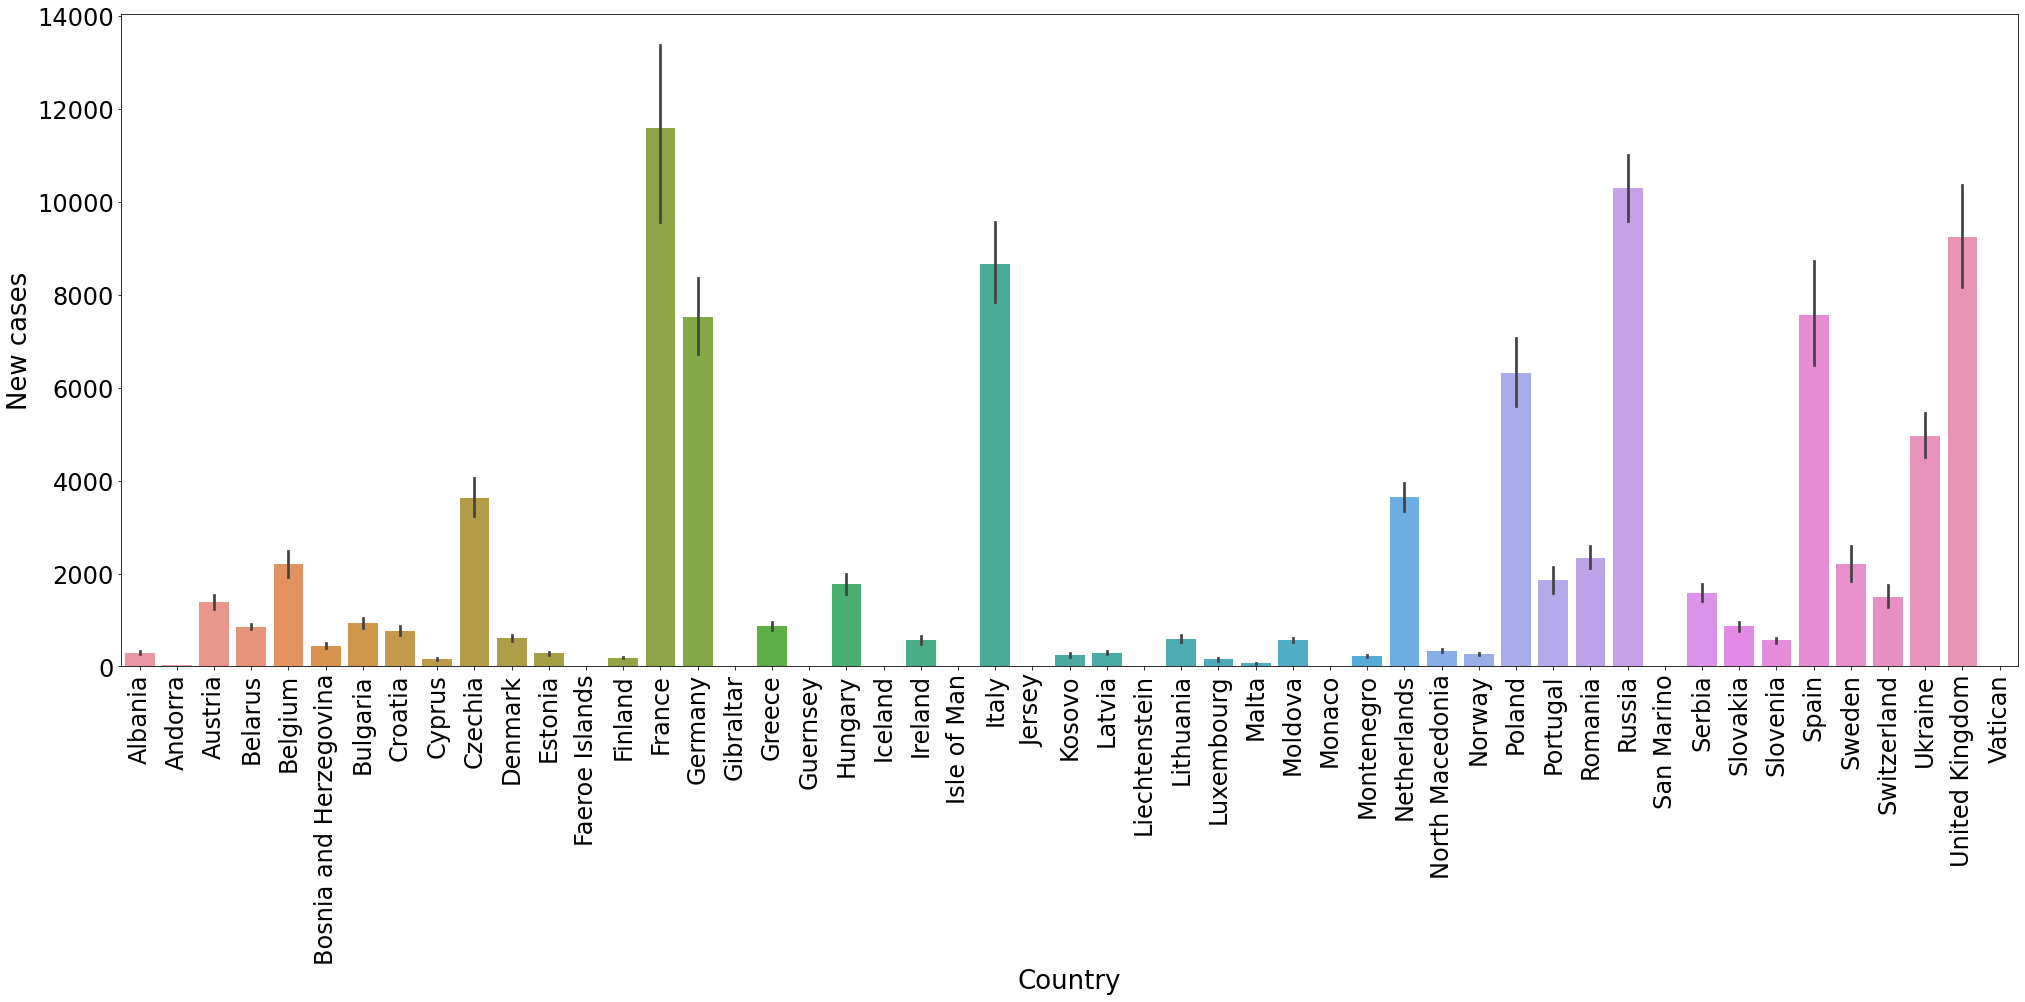

In [57]:
plt.figure(figsize=(34,12))
sns.barplot(x='location',y='new_cases', data=df_europe)
plt.xlabel('Country', fontsize=26)
plt.xticks(fontsize=24,rotation='90')
plt.ylabel('New cases', fontsize=26)
plt.yticks(fontsize=24)
plt.show()

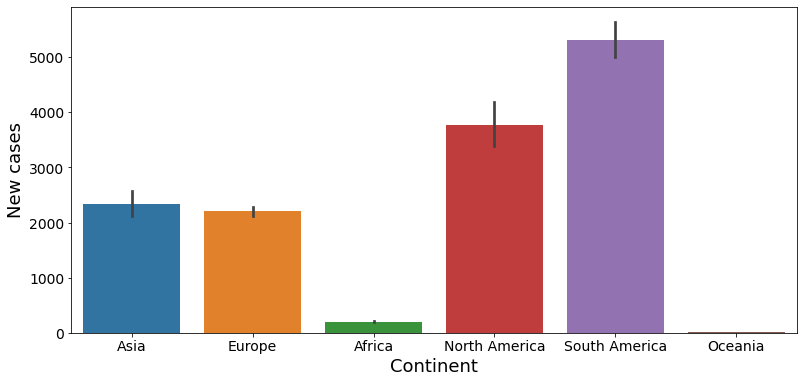

In [58]:
plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='new_cases', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('New cases', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

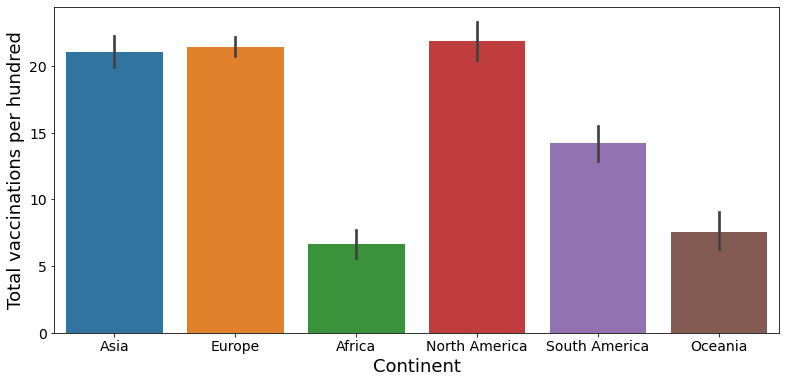

In [59]:
plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='total_vaccinations_per_hundred', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Total vaccinations per hundred', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [60]:
# correlations

correlat=df.corr()
correlat
#correlat>0.9

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.861477,0.889136,0.986883,0.847969,0.875426,0.130360,0.050633,0.066779,0.155256,0.057852,0.082917,-0.003001,0.747408,0.171606,0.695023,0.069936,0.599081,0.179342,0.702382,0.054360,0.799400,0.959895,0.106709,0.042297,0.826812,0.049119,0.017291,-0.033835,0.776230,0.838881,0.803723,0.760571,0.786745,-0.011208,-0.029759,-0.036357,0.007091,0.072601,0.619397,-0.015878,0.031745,0.029168,0.026093,0.017335,-0.034189,-0.035569,0.019916,-0.000649,-0.009269,0.030776,-0.006911,0.020726,0.036239
new_cases,0.861477,1.000000,0.979998,0.862506,0.920742,0.915288,0.080682,0.099986,0.096037,0.100535,0.076874,0.095542,0.014987,0.910894,0.267223,0.885638,0.157403,0.610928,0.177214,0.906769,0.128828,0.757425,0.652157,0.036602,0.027029,0.756609,0.028726,0.088419,-0.033125,0.642693,0.678339,0.637893,0.662355,0.677151,-0.073773,-0.094144,-0.100548,-0.029220,0.091447,0.686640,-0.017129,0.033217,0.029814,0.026376,0.013896,-0.035176,-0.037256,0.022261,-0.004140,-0.010921,0.035092,-0.009061,0.020932,0.036497
new_cases_smoothed,0.889136,0.979998,1.000000,0.888244,0.922454,0.940403,0.085353,0.077054,0.098490,0.106452,0.073815,0.100362,0.011103,0.953642,0.281295,0.924533,0.165416,0.730372,0.254647,0.938093,0.137381,0.788430,0.684932,0.040228,0.028055,0.799291,0.031615,0.090740,-0.034658,0.672145,0.706910,0.663767,0.681351,0.701543,-0.070561,-0.091250,-0.098323,-0.026732,0.095667,0.699816,-0.017461,0.034144,0.030870,0.027371,0.014433,-0.035664,-0.038005,0.022382,-0.003760,-0.011276,0.035546,-0.008939,0.021449,0.037356
total_deaths,0.986883,0.862506,0.888244,1.000000,0.871862,0.899529,0.119845,0.044038,0.058080,0.173003,0.065714,0.086834,-0.003234,0.767295,0.162865,0.731152,0.079746,0.560866,0.075503,0.711309,0.037696,0.764900,0.886549,0.090503,0.034544,0.787199,0.039260,0.057455,-0.042518,0.739573,0.811799,0.781875,0.724141,0.751124,-0.017676,-0.032442,-0.042325,0.005565,0.075575,0.641690,-0.019705,0.034606,0.031600,0.029113,0.013761,-0.041655,-0.043018,0.026146,-0.002129,-0.008839,0.039686,-0.009622,0.024789,0.040207
new_deaths,0.847969,0.920742,0.922454,0.871862,1.000000,0.974251,0.075932,0.066044,0.077271,0.121450,0.126708,0.130474,0.005488,0.896917,0.322791,0.904849,0.235581,0.631696,0.281244,0.885585,0.184766,0.723675,0.611514,0.020118,0.017490,0.696665,0.013883,0.169612,-0.045444,0.590365,0.631789,0.594828,0.619307,0.630230,-0.082104,-0.099860,-0.107057,-0.031394,0.120953,0.706078,-0.021623,0.036129,0.031378,0.028345,0.008476,-0.043943,-0.041652,0.029079,-0.005372,-0.007438,0.044537,-0.008532,0.023757,0.040062
new_deaths_smoothed,0.875426,0.915288,0.940403,0.899529,0.974251,1.000000,0.088133,0.064298,0.084607,0.127625,0.103939,0.141788,0.004226,0.940911,0.334992,0.945321,0.244847,0.675518,0.219722,0.895989,0.149577,0.728224,0.646025,0.027854,0.017306,0.734060,0.018697,0.176084,-0.046433,0.608696,0.651039,0.615678,0.625244,0.647450,-0.0

In [61]:
col1=df['new_cases_per_million']
col2=df['total_vaccinations_per_hundred']
col1.corr(col2)

0.14743202442271153

In [62]:
country_ml_min=df['location'].loc[df['male_smokers'].idxmin()]
print(f"{country_ml_min} has the lowest number of males smokers:{df['male_smokers'].min()}%")

Ghana has the lowest number of males smokers:7.7%


In [63]:
country_ml_max=df['location'].loc[df['male_smokers'].idxmax()]
print(f"{country_ml_max} has the highest number of males smokers:{df['male_smokers'].max()}%")

Timor has the highest number of males smokers:78.1%


In [64]:
country_fl_max=df['location'].loc[df['female_smokers'].idxmax()]
print(f"{country_fl_max} has the highest number of females smokers:{df['female_smokers'].max()}%")

Montenegro has the highest number of females smokers:44.0%


In [65]:
country_fl_min=df['location'].loc[df['female_smokers'].idxmin()]
print(f"{country_fl_min} has the lowest number of females smokers:{df['female_smokers'].min()}%")

Niger has the lowest number of females smokers:0.1%


In [66]:
country_pvh_max=df['location'].loc[df['people_vaccinated_per_hundred'].idxmax()]
print(f"{country_pvh_max} has the highest number of vaccinated people:{df[df.location==country_pvh_max]['people_vaccinated_per_hundred'].mean():.0f}%")

Gibraltar has the highest number of vaccinated people:70%
